In [40]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

dataframe_mysql = spark.read.format("jdbc").options(
    url="jdbc:mysql://localhost:3306/loan",
    driver = "com.mysql.jdbc.Driver",
    dbtable = "mytable",
    user="root",
    password="sanjay2001").load()

dataframe_mysql.show()

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|             0E-8|      null|             360|          true|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|    1508.00000000|       128|             360|          true|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|             0E-8|        66|             360|          true|        Urban|          Y

In [41]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
spark.conf.set("spark.sql.crossJoin.enabled", "true")
print(dataframe_mysql.toPandas().shape)

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


(614, 13)


In [42]:
dataframe_mysql.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: boolean (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: string (nullable = true)



In [43]:
dataframe_mysql.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Loan_ID,614,None,None,LP001002,LP002990
Gender,601,None,None,Female,Male
Married,611,None,None,No,Yes
Dependents,599,0.5547445255474452,0.7853289861674311,0,3+
Education,614,None,None,Graduate,Not Graduate
Self_Employed,582,None,None,No,Yes
ApplicantIncome,614,5403.459283387622,6109.041673387181,150,81000
CoapplicantIncome,614,1621.245798027101,2926.2483692241894,0E-8,41667.00000000
LoanAmount,592,146.41216216216216,85.58732523570545,9,700


In [44]:

from pyspark.sql.functions import col, when
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[1], when(col(dataframe_mysql.columns[1]) == "Male", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[2], when(col(dataframe_mysql.columns[2]) == "Yes", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[4], when(col(dataframe_mysql.columns[4]) == "Graduate", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[5], when(col(dataframe_mysql.columns[5]) == "Yes", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[10], when(col(dataframe_mysql.columns[10]) == "true", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[11], when(col(dataframe_mysql.columns[11]) == "Urban", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[12], when(col(dataframe_mysql.columns[12]) == "Y", 1).otherwise(0))
dataframe_mysql=dataframe_mysql.na.replace('0E-8', '0')
dataframe_mysql.show(5)

+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|     1|      0|         0|        1|            0|           5849|             0E-8|      null|             360|             1|            1|          1|
|LP001003|     1|      1|         1|        1|            0|           4583|    1508.00000000|       128|             360|             1|            0|          0|
|LP001005|     1|      1|         0|        1|            1|           3000|             0E-8|        66|             360|             1|            1|          1|
|LP001006|     1

In [45]:
dataframe_mysql = dataframe_mysql.withColumn("Dependents", \
              when(dataframe_mysql["Dependents"] == "3+", 3).otherwise(dataframe_mysql["Dependents"]))
dataframe_mysql=dataframe_mysql.na.drop()
dataframe_mysql.show()

+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001003|     1|      1|         1|        1|            0|           4583|    1508.00000000|       128|             360|             1|            0|          0|
|LP001005|     1|      1|         0|        1|            1|           3000|             0E-8|        66|             360|             1|            1|          1|
|LP001006|     1|      1|         0|        0|            0|           2583|    2358.00000000|       120|             360|             1|            1|          1|
|LP001008|     1

In [46]:
dataframe_mysql = dataframe_mysql.drop(col("Loan_ID")) 
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: string (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



In [47]:
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: string (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



In [48]:
from pyspark.sql.types import IntegerType
dataframe_mysql = dataframe_mysql.withColumn("Dependents",dataframe_mysql["Dependents"].cast(IntegerType()))
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: integer (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



In [49]:
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: integer (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



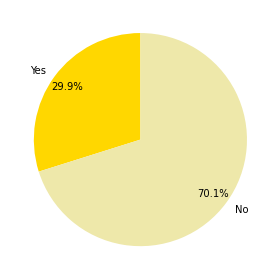

In [50]:
# dataframe_mysql = dataframe_mysql.selectExpr("cast(Dependents as int) Dependents")
# dataframe_mysql.printSchema()
labels = ['Yes', 'No']
sizes = [dataframe_mysql.filter(dataframe_mysql['Loan_Status'] == 0).select('Loan_Status').count(), dataframe_mysql.filter(dataframe_mysql['Loan_Status'] == 1).select('Loan_Status').count()]
colors = ['#FFD700','#EEE8AA']

plt.pie(sizes, colors = colors, labels=labels, autopct='%.1f%%', startangle=90, pctdistance=0.85)
fig = plt.gcf()
plt.tight_layout()
plt.show()

In [51]:
features = dataframe_mysql.drop('Loan_Status')

In [52]:
#let's assemble our features together using vectorAssembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=features.columns,
    outputCol="features")

In [53]:
output = assembler.transform(dataframe_mysql)

In [54]:
output= output.select("features", "Loan_Status")

In [55]:
train_df,test_df = output.randomSplit([0.7, 0.3])

In [56]:
print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))

Training Dataset Count: 389
Test Dataset Count: 177


In [57]:
# train_df.show()
# test_df.show()

Logistic Regression Model

In [58]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'Loan_Status', maxIter=10)
lrModel = lr.fit(train_df)

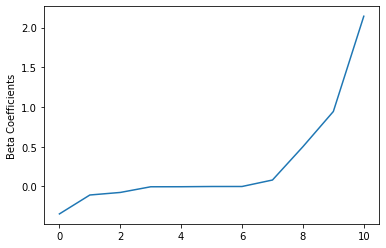

In [59]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


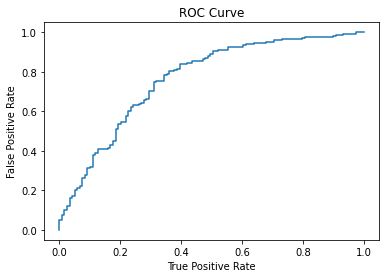

Training set areaUnderROC: 0.7638032990974166


In [60]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


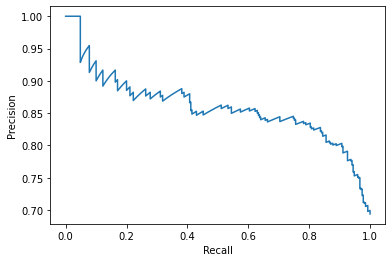

In [61]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [62]:
predictions = lrModel.transform(test_df)
predictions.select("features","Loan_status","rawPrediction","probability","prediction").show()

+--------------------+-----------+--------------------+--------------------+----------+
|            features|Loan_status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          1|[0.75852548723240...|[0.68103351553714...|       0.0|
|(11,[0,1,5,6,7,8]...|          0|[0.71075136088702...|[0.67056716183719...|       0.0|
|(11,[0,2,3,5,7,8]...|          1|[1.27296672498774...|[0.78125017930229...|       0.0|
|(11,[0,3,5,7,8],[...|          1|[0.99775911671733...|[0.73061776617829...|       0.0|
|(11,[0,3,5,7,8,9]...|          1|[-1.1767176820576...|[0.23564287889011...|       1.0|
|(11,[0,3,5,7,8,9]...|          1|[-0.5843628280309...|[0.35792932604782...|       1.0|
|(11,[0,3,5,7,8,9]...|          0|[-0.6914802071793...|[0.33370387472365...|       1.0|
|(11,[0,4,5,7,8,9]...|          1|[-0.3365430002837...|[0.41664946726679...|       1.0|
|(11,[0,5,6,7,8,9]...|          

In [63]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.6474015748031496


In [64]:
lrpredictB = predictions[predictions.prediction==0].toPandas()
lrpredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [65]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
result = pd.concat([lrpredictB,lrpredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Logistic Regression --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


-- Logistic Regression --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.56      0.38      0.45        50
           1       0.78      0.88      0.83       127

    accuracy                           0.74       177
   macro avg       0.67      0.63      0.64       177
weighted avg       0.72      0.74      0.72       177

------------------------------------------------------------------------
Confusion matrix
 [[ 19  31]
 [ 15 112]] 




In [66]:
def accuracy_m(model): 
    predictions = model.transform(test_df)
    cm = predictions.select("Loan_Status", "prediction")
    acc = cm.filter(cm.Loan_Status == cm.prediction).count() / cm.count()
    x = ("Model accuracy: %.3f%%" % (acc * 100)) 
    return x



In [67]:
x = accuracy_m(model = lrModel)
print(x)

Model accuracy: 74.011%


Decision Tree Classifier


In [68]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Loan_Status', maxDepth = 3)
dtModel = dt.fit(train_df)

In [69]:
predictions = dtModel.transform(test_df)
predictions.select('features', 'Loan_Status', 'rawPrediction', 'probability', 'prediction').show(10)

+--------------------+-----------+-------------+--------------------+----------+
|            features|Loan_Status|rawPrediction|         probability|prediction|
+--------------------+-----------+-------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          1|  [57.0,27.0]|[0.67857142857142...|       0.0|
|(11,[0,1,5,6,7,8]...|          0|  [57.0,27.0]|[0.67857142857142...|       0.0|
|(11,[0,2,3,5,7,8]...|          1|  [57.0,27.0]|[0.67857142857142...|       0.0|
|(11,[0,3,5,7,8],[...|          1|  [57.0,27.0]|[0.67857142857142...|       0.0|
|(11,[0,3,5,7,8,9]...|          1| [57.0,239.0]|[0.19256756756756...|       1.0|
|(11,[0,3,5,7,8,9]...|          1| [57.0,239.0]|[0.19256756756756...|       1.0|
|(11,[0,3,5,7,8,9]...|          0| [57.0,239.0]|[0.19256756756756...|       1.0|
|(11,[0,4,5,7,8,9]...|          1| [57.0,239.0]|[0.19256756756756...|       1.0|
|(11,[0,5,6,7,8,9]...|          1| [57.0,239.0]|[0.19256756756756...|       1.0|
|(11,[0,5,7,8,9],[...|      

In [70]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.6496062992125984


In [71]:
dtpredictB = predictions[predictions.prediction==0].toPandas()
dtpredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [72]:
result = pd.concat([dtpredictB,dtpredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Decision Tree Classifier --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
DT=confusion_matrix(true_labels,predicted_labels)

-- Decision Tree Classifier --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.58      0.44      0.50        50
           1       0.80      0.87      0.83       127

    accuracy                           0.75       177
   macro avg       0.69      0.66      0.67       177
weighted avg       0.74      0.75      0.74       177

------------------------------------------------------------------------
Confusion matrix
 [[ 22  28]
 [ 16 111]] 




In [73]:
x = accuracy_m(model = dtModel)
print(x)

Model accuracy: 75.141%


Random Forest Classifier

In [74]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Loan_Status')
rfModel = rf.fit(train_df)

In [75]:
predictions = rfModel.transform(test_df)
predictions.select('features', 'Loan_Status', 'rawPrediction', 'probability', 'prediction').show()

+--------------------+-----------+--------------------+--------------------+----------+
|            features|Loan_Status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          1|[11.2516127703660...|[0.56258063851830...|       0.0|
|(11,[0,1,5,6,7,8]...|          0|[12.0969314524564...|[0.60484657262282...|       0.0|
|(11,[0,2,3,5,7,8]...|          1|[11.9720051289985...|[0.59860025644992...|       0.0|
|(11,[0,3,5,7,8],[...|          1|[10.7050464946033...|[0.53525232473016...|       0.0|
|(11,[0,3,5,7,8,9]...|          1|[4.45472741441941...|[0.22273637072097...|       1.0|
|(11,[0,3,5,7,8,9]...|          1|[6.27705445844457...|[0.31385272292222...|       1.0|
|(11,[0,3,5,7,8,9]...|          0|[6.27705445844457...|[0.31385272292222...|       1.0|
|(11,[0,4,5,7,8,9]...|          1|[6.52148326074307...|[0.32607416303715...|       1.0|
|(11,[0,5,6,7,8,9]...|          

In [76]:
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7046456692913383


In [77]:
rfpredictB = predictions[predictions.prediction==0].toPandas()
rfpredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [78]:
result = pd.concat([rfpredictB,rfpredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Random Forest Classifier --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
DT=confusion_matrix(true_labels,predicted_labels)

-- Random Forest Classifier --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.57      0.34      0.42        50
           1       0.78      0.90      0.83       127

    accuracy                           0.74       177
   macro avg       0.67      0.62      0.63       177
weighted avg       0.72      0.74      0.72       177

------------------------------------------------------------------------
Confusion matrix
 [[ 17  33]
 [ 13 114]] 




In [79]:
x = accuracy_m(model = rfModel)
print(x)

Model accuracy: 74.011%


Multilayered Perceptron

In [80]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
layers = [11, 256,128,64, 32,16,8,2]
trainer = MultilayerPerceptronClassifier(labelCol="Loan_Status",maxIter=100, layers=layers, blockSize=128, seed=1234)
mpModel = trainer.fit(train_df)


In [81]:
predictions = mpModel.transform(test_df)
predictions.select('features', 'Loan_Status', 'rawPrediction', 'probability', 'prediction').show()

+--------------------+-----------+--------------------+--------------------+----------+
|            features|Loan_Status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          1|[-1.5241856098129...|[0.23206453624712...|       1.0|
|(11,[0,1,5,6,7,8]...|          0|[-1.5178176419295...|[0.23465289651272...|       1.0|
|(11,[0,2,3,5,7,8]...|          1|[-1.4441751098279...|[0.26610984622637...|       1.0|
|(11,[0,3,5,7,8],[...|          1|[-1.4441751102051...|[0.26610984605626...|       1.0|
|(11,[0,3,5,7,8,9]...|          1|[-1.5749927932812...|[0.21214375445443...|       1.0|
|(11,[0,3,5,7,8,9]...|          1|[-1.7913160056652...|[0.14143345739503...|       1.0|
|(11,[0,3,5,7,8,9]...|          0|[-1.8002082302020...|[0.13900139506144...|       1.0|
|(11,[0,4,5,7,8,9]...|          1|[-1.4441751101647...|[0.26610984607451...|       1.0|
|(11,[0,5,6,7,8,9]...|          

In [82]:
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.5047244094488188


In [83]:
mppredictB = predictions[predictions.prediction==0].toPandas()
mppredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [84]:
result = pd.concat([mppredictB,mppredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Multilayered Perceptron --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
DT=confusion_matrix(true_labels,predicted_labels)

-- Multilayered Perceptron --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.72      1.00      0.84       127

    accuracy                           0.72       177
   macro avg       0.36      0.50      0.42       177
weighted avg       0.51      0.72      0.60       177

------------------------------------------------------------------------
Confusion matrix
 [[  0  50]
 [  0 127]] 




c:\Users\venka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\venka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\venka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [85]:
x = accuracy_m(model = mpModel)
print(x)

Model accuracy: 71.751%
